In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('ny-flights.csv')
print(data.head())

               fl_date unique_carrier  airline_id tail_num  fl_num origin  \
0  2014-01-01 00:00:00             AA       19805   N338AA       1    JFK   
1  2014-01-01 00:00:00             AA       19805   N335AA       3    JFK   
2  2014-01-01 00:00:00             AA       19805   N327AA      21    JFK   
3  2014-01-01 00:00:00             AA       19805   N3EHAA      29    LGA   
4  2014-01-01 00:00:00             AA       19805   N319AA     117    JFK   

  dest  dep_time  dep_delay  arr_time  arr_delay  cancelled  \
0  LAX     914.0       14.0    1238.0       13.0        0.0   
1  LAX    1157.0       -3.0    1523.0       13.0        0.0   
2  LAX    1902.0        2.0    2224.0        9.0        0.0   
3  PBI     722.0       -8.0    1014.0      -26.0        0.0   
4  LAX    1347.0        2.0    1706.0        1.0        0.0   

                   arr                  dep  
0  2014-01-01 12:38:00  2014-01-01 09:14:00  
1  2014-01-01 15:23:00  2014-01-01 11:57:00  
2  2014-01-01 22:24:

1. Summary of the Dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20817 entries, 0 to 20816
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fl_date         20817 non-null  object 
 1   unique_carrier  20817 non-null  object 
 2   airline_id      20817 non-null  int64  
 3   tail_num        20512 non-null  object 
 4   fl_num          20817 non-null  int64  
 5   origin          20817 non-null  object 
 6   dest            20817 non-null  object 
 7   dep_time        18462 non-null  float64
 8   dep_delay       18462 non-null  float64
 9   arr_time        18412 non-null  float64
 10  arr_delay       18383 non-null  float64
 11  cancelled       20817 non-null  float64
 12  arr             18412 non-null  object 
 13  dep             18462 non-null  object 
dtypes: float64(5), int64(2), object(7)
memory usage: 2.2+ MB


2. Size of the Dataset

In [7]:
n_rows, n_columns = data.shape
print(f"Number of rows: {n_rows}")
print(f"Number of columns: {n_columns}")


Number of rows: 20817
Number of columns: 14


3. What are the datatypes of each column

In [9]:
with open("ny-flights.csv") as file:
    data = pd.read_csv(file)
print("Data types of each column:")
print(data.dtypes)

Data types of each column:
fl_date            object
unique_carrier     object
airline_id          int64
tail_num           object
fl_num              int64
origin             object
dest               object
dep_time          float64
dep_delay         float64
arr_time          float64
arr_delay         float64
cancelled         float64
arr                object
dep                object
dtype: object


4. Are there any missing values in the dataset

In [12]:

missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
fl_date              0
unique_carrier       0
airline_id           0
tail_num           305
fl_num               0
origin               0
dest                 0
dep_time          2355
dep_delay         2355
arr_time          2405
arr_delay         2434
cancelled            0
arr               2405
dep               2355
dtype: int64


5. For the given Dataset column arr_delay, calculate the
mean, median, and standard deviation.

In [13]:
mean = data["arr_delay"].mean()
median = data["arr_delay"].median()
std = data["arr_delay"].std()
print("Mean of arr_delay:",mean)
print("Median of arr_delay:",median)
print("Standard deviation of arr_delay:",std)

Mean of arr_delay: 21.38073219822662
Median of arr_delay: 3.0
Standard deviation of arr_delay: 64.6055910802833


6. Identify any potential outliers in a numerical column arr_delay

In [15]:
Q1 = data["arr_delay"].quantile(0.25)
Q3 = data["arr_delay"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data["arr_delay"] < lower_bound) | (data["arr_delay"] > upper_bound)]
print("Q1:",Q1)
print("Q3:",Q3)
print("IQR:",IQR)
print("Lower bound for outliers:",lower_bound)
print(f"Upper bound for outliers:", upper_bound)
print("Number of potential outliers:",outliers)
print("\nPotential outliers:")
print(outliers[["arr_delay"]])

Q1: -12.0
Q3: 28.0
IQR: 40.0
Lower bound for outliers: -72.0
Upper bound for outliers: 88.0
Number of potential outliers:                    fl_date unique_carrier  airline_id tail_num  fl_num origin  \
11     2014-01-01 00:00:00             AA       19805   N336AA     181    JFK   
25     2014-01-01 00:00:00             AA       19805   N553AA     341    LGA   
77     2014-01-01 00:00:00             B6       20409   N337JB     316    JFK   
79     2014-01-01 00:00:00             B6       20409   N337JB    1515    SYR   
80     2014-01-01 00:00:00             B6       20409   N337JB    1729    JFK   
...                    ...            ...         ...      ...     ...    ...   
20657  2014-01-31 00:00:00             DL       19790   N977DL    2219    LGA   
20658  2014-01-31 00:00:00             DL       19790   N900DE    2231    LGA   
20696  2014-01-31 00:00:00             MQ       20398   N856MQ    2875    ART   
20773  2014-01-31 00:00:00             EV       20366   N828AS    57

7. Correlation matrix for the given dataset ny-flights.

In [16]:
num_columns = data.select_dtypes(include='number').columns
corr_matrix = data[num_columns].corr()
print("Correlation matrix:")
print(corr_matrix)

Correlation matrix:
            airline_id    fl_num  dep_time  dep_delay  arr_time  arr_delay  \
airline_id    1.000000  0.165427  0.068787  -0.001510  0.000359   0.018637   
fl_num        0.165427  1.000000  0.037538   0.003662  0.015185   0.009601   
dep_time      0.068787  0.037538  1.000000   0.205036  0.658571   0.168048   
dep_delay    -0.001510  0.003662  0.205036   1.000000  0.033294   0.952380   
arr_time      0.000359  0.015185  0.658571   0.033294  1.000000   0.013732   
arr_delay     0.018637  0.009601  0.168048   0.952380  0.013732   1.000000   
cancelled     0.081613  0.113438  0.008808   0.088048       NaN        NaN   

            cancelled  
airline_id   0.081613  
fl_num       0.113438  
dep_time     0.008808  
dep_delay    0.088048  
arr_time          NaN  
arr_delay         NaN  
cancelled    1.000000  


8. Heatmap for the correlation matrix above

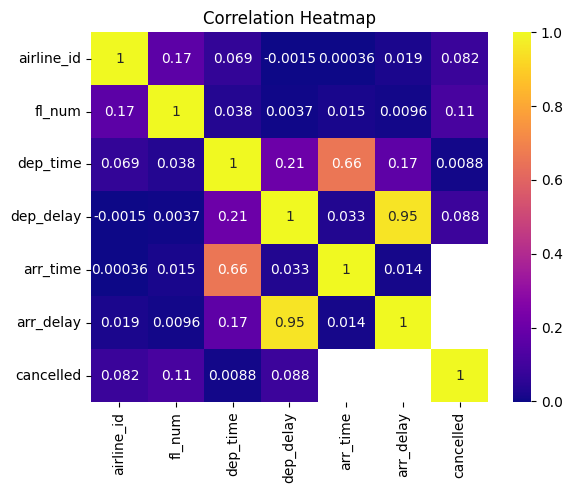

In [18]:
sns.heatmap(corr_matrix, annot=True, cmap='plasma')
plt.title('Correlation Heatmap')
plt.show()
